In [91]:
import pandas as pd

from sklearn.impute import KNNImputer

In [92]:
pd.set_option('display.max_rows', 60) # Resetting to default of 60

movies = pd.read_csv('../Project4/Data/movies.csv')
movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [93]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [94]:
movies.shape

(7668, 15)

In [95]:
movies.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [96]:
# There are duplicate movie names
movies['name'].value_counts()

# Initially had set the movie name to the index, but that wouldn't work with duplicate names

name
Nobody's Fool            3
Hercules                 3
Anna                     3
Hamlet                   3
Fever Pitch              3
                        ..
The Road to Wellville    1
The Cowboy Way           1
Blue Chips               1
Eat Drink Man Woman      1
Tee em el                1
Name: count, Length: 7512, dtype: int64

In [97]:
movies[movies['name'] == 'Fever Pitch']

# For example, the movie Fever Pitch is 3 movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
802,Fever Pitch,R,Drama,1985,"November 22, 1985 (United States)",4.1,243.0,Richard Brooks,Richard Brooks,Ryan O'Neal,United States,7000000.0,618847.0,Metro-Goldwyn-Mayer (MGM),96.0
3170,Fever Pitch,R,Comedy,1997,"April 4, 1997 (United Kingdom)",6.7,10000.0,David Evans,Nick Hornby,Colin Firth,United Kingdom,NaN,3736.0,Channel Four Films,102.0
4759,Fever Pitch,PG-13,Comedy,2005,"April 8, 2005 (United States)",6.2,43000.0,Bobby Farrelly,Lowell Ganz,Drew Barrymore,United States,30000000.0,50605163.0,Fox 2000 Pictures,104.0


In [99]:
movies.shape

(7668, 15)

In [100]:
# No duplicates after dropping duplicates
movies.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


#### Movies where the gross is missing we need to remove since the gross is a key part of the dependent variable we are going to measure

In [102]:
movies.dropna(subset = ['gross'], inplace = True)

In [103]:
movies.isnull().sum()

name           0
rating        54
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         3
star           0
country        1
budget      2043
gross          0
company       10
runtime        1
dtype: int64

In [104]:
movies[movies['company'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
408,A Night in Heaven,R,Drama,1983,"November 18, 1983 (United States)",4.3,1200.0,John G. Avildsen,Joan Tewkesbury,Christopher Atkins,United States,NaN,5563663.0,NaN,83.0
633,The Bear,PG,Biography,1984,"September 28, 1984 (United States)",6.1,270.0,Richard C. Sarafian,Michael Kane,Gary Busey,United States,221000.0,2687148.0,NaN,110.0
969,Modern Girls,PG-13,Comedy,1986,"November 7, 1986 (United States)",5.8,1300.0,Jerry Kramer,Laurie Craig,Daphne Zuniga,United States,NaN,604849.0,NaN,84.0
1033,P.O.W. the Escape,R,Action,1986,"April 4, 1986 (United States)",5.0,533.0,Gideon Amir,Malcolm Barbour,David Carradine,United States,NaN,2497233.0,NaN,90.0
1572,Heart of Dixie,PG,Drama,1989,"August 25, 1989 (United States)",5.2,677.0,Martin Davidson,Anne Rivers Siddons,Ally Sheedy,United States,8000000.0,1097333.0,NaN,95.0
1594,Lost Angels,R,Drama,1989,"May 5, 1989 (United States)",6.0,881.0,Hugh Hudson,Michael Weller,Donald Sutherland,United States,NaN,1247946.0,NaN,116.0
1630,Staying Together,R,Comedy,1989,"November 10, 1989 (United States)",6.2,761.0,Lee Grant,Monte Merrick,Sean Astin,United States,NaN,4348025.0,NaN,91.0
1806,Streets,R,Action,1990,"January 19, 1990 (United States)",5.7,712.0,Katt Shea,Andy Ruben,Christina Applegate,United States,NaN,1510053.0,NaN,85.0
7599,End of the Century,Unrated,Drama,2019,"August 16, 2019 (United States)",6.9,2700.0,Lucio Castro,Lucio Castro,Juan Barberini,Argentina,NaN,103047.0,NaN,84.0
7657,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,NaN,25818882.0,NaN,135.0


### 3 movies were writer is missing - we will drop these rather than imputing writer

Even after searching, 2 of those 3 movies don't have a listed writer. 

In [105]:
movies[movies['writer'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1820,The Garden,Unrated,Drama,1990,1990 (United States),6.4,840.0,Derek Jarman,NaN,Tilda Swinton,United Kingdom,NaN,5006.0,Basilisk Communications,92.0
5834,The Trip,Not Rated,Comedy,2010,"April 24, 2011 (Greece)",7.0,22000.0,Michael Winterbottom,NaN,Steve Coogan,United Kingdom,NaN,3945217.0,Baby Cow Productions,112.0
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,NaN,240663149.0,Beijing Enlight Pictures,110.0


In [106]:
movies.dropna(subset = ['writer'], inplace = True)
movies[movies['writer'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [107]:
#1 where country is missing
movies[movies['country'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7615,Clinton Road,NaN,Horror,2019,"June 14, 2019 (United States)",5.9,1900.0,Richard Grieco,Noel Ashman,Ace Young,NaN,2500000.0,50400.0,Growing Tree Productions,77.0


#### The movie where the country is missing is made by a company, director, writer and star that made only one movie. Rather than imputing country, we will drop this from the data set.

In [108]:
movies[movies['company'] == 'Growing Tree Productions']

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7615,Clinton Road,NaN,Horror,2019,"June 14, 2019 (United States)",5.9,1900.0,Richard Grieco,Noel Ashman,Ace Young,NaN,2500000.0,50400.0,Growing Tree Productions,77.0


In [109]:
movies[movies['director'] == 'Richard Grieco']

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7615,Clinton Road,NaN,Horror,2019,"June 14, 2019 (United States)",5.9,1900.0,Richard Grieco,Noel Ashman,Ace Young,NaN,2500000.0,50400.0,Growing Tree Productions,77.0


In [110]:
movies[movies['writer'] == 'Noel Ashman']

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7615,Clinton Road,NaN,Horror,2019,"June 14, 2019 (United States)",5.9,1900.0,Richard Grieco,Noel Ashman,Ace Young,NaN,2500000.0,50400.0,Growing Tree Productions,77.0


In [111]:
movies[movies['star'] == 'Ace Young']

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7615,Clinton Road,NaN,Horror,2019,"June 14, 2019 (United States)",5.9,1900.0,Richard Grieco,Noel Ashman,Ace Young,NaN,2500000.0,50400.0,Growing Tree Productions,77.0


In [112]:
movies.dropna(subset = ['country'], inplace = True)
movies[movies['country'].isnull()]
    # Confirming no nulls in country

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


### Exploring Rating

In [113]:
movies['rating'].value_counts(dropna = False)

rating
R            3613
PG-13        2091
PG           1222
Not Rated     258
G             152
NaN            53
Unrated        46
NC-17          23
TV-MA           9
X               3
TV-PG           3
Approved        1
TV-14           1
Name: count, dtype: int64

In [114]:
movies[movies['rating'].isin(['TV-MA', 'TV-PG', 'Approved', 'TV-14'])]
    # TV MA is like an R rating
    # TV PG is like a PG Rating
    # TV 14 is like a PG-13 Rating   


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
120,Tarzan the Ape Man,Approved,Adventure,1981,"July 24, 1981 (United States)",3.4,5300.0,John Derek,Tom Rowe,Bo Derek,United States,6500000.0,36565280.0,Metro-Goldwyn-Mayer (MGM),115.0
2017,Daughters of the Dust,TV-PG,Drama,1991,"December 27, 1991 (United States)",6.6,2300.0,Julie Dash,Julie Dash,Cora Lee Day,United States,NaN,1689723.0,Geechee Girls,113.0
2689,Ghost in the Shell,TV-MA,Animation,1995,"March 29, 1996 (United States)",8.0,133000.0,Mamoru Oshii,Shirow Masamune,Atsuko Tanaka,Japan,NaN,516540.0,Kôdansha,83.0
2833,La fille seule,TV-MA,Drama,1995,"October 30, 1996 (United States)",6.9,1500.0,Benoît Jacquot,Jérôme Beaujour,Virginie Ledoyen,France,NaN,230049.0,Cinéa,90.0
3886,Sex and Lucía,TV-MA,Drama,2001,"August 24, 2001 (Spain)",7.1,36000.0,Julio Medem,Julio Medem,Paz Vega,Spain,NaN,7640680.0,Alicia Produce,128.0
3894,Bully,TV-MA,Biography,2001,"December 12, 2001 (France)",6.9,35000.0,Larry Clark,Jim Schutze,Brad Renfro,United States,NaN,704808.0,StudioCanal,108.0
4634,Mind Game,TV-MA,Animation,2004,"June 26, 2005 (United States)",7.8,8700.0,Masaaki Yuasa,Robin Nishi,Kôji Imada,Japan,NaN,36613.0,Studio 4°C,103.0
5587,Darbareye Elly,TV-PG,Drama,2009,"June 6, 2009 (Iran)",8.0,48000.0,Asghar Farhadi,Asghar Farhadi,Golshifteh Farahani,Iran,NaN,879422.0,Dreamlab,119.0
6755,Beasts of No Nation,TV-MA,Drama,2015,"October 16, 2015 (United States)",7.7,76000.0,Cary Joji Fukunaga,Cary Joji Fukunaga,Abraham Attah,United States,6000000.0,90777.0,Red Crown Productions,137.0
6871,Your Name.,TV-PG,Animation,2016,"April 7, 2017 (United States)",8.4,215000.0,Makoto Shinkai,Makoto Shinkai,Ryûnosuke Kamiki,Japan,NaN,358180115.0,Amuse,106.0


In [115]:
# All the X or NC-17 ratings
movies[(movies['rating'] == 'NC-17') | (movies['rating'] == 'X')]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
96,The Evil Dead,NC-17,Horror,1981,"April 15, 1983 (United States)",7.5,192000.0,Sam Raimi,Sam Raimi,Bruce Campbell,United States,350000.0,2956630.0,Renaissance Pictures,85.0
926,Matador,NC-17,Drama,1986,"March 7, 1986 (Spain)",7.0,11000.0,Pedro Almodóvar,Pedro Almodóvar,Assumpta Serna,Spain,NaN,286126.0,Compañía Iberoamericana de TV,110.0
982,Devil in the Flesh,X,Drama,1986,"May 22, 1987 (United States)",5.8,1400.0,Marco Bellocchio,Marco Bellocchio,Maruschka Detmers,Italy,NaN,546904.0,L.P. Film,114.0
1065,Angel Heart,X,Horror,1987,"March 6, 1987 (United States)",7.3,83000.0,Alan Parker,William Hjortsberg,Mickey Rourke,United Kingdom,17000000.0,17186348.0,Carolco International N.V.,113.0
1476,"The Cook, the Thief, His Wife & Her Lover",X,Crime,1989,"April 6, 1990 (United States)",7.6,36000.0,Peter Greenaway,Peter Greenaway,Richard Bohringer,Netherlands,NaN,7724701.0,Allarts,124.0
1489,Tie Me Up! Tie Me Down!,NC-17,Comedy,1989,"January 22, 1990 (Spain)",7.0,26000.0,Pedro Almodóvar,Pedro Almodóvar,Victoria Abril,Spain,NaN,4088140.0,El Deseo,101.0
1703,Henry & June,NC-17,Biography,1990,"October 5, 1990 (United States)",6.3,13000.0,Philip Kaufman,Anaïs Nin,Fred Ward,United States,NaN,23472449.0,Universal Pictures,136.0
1946,Whore,NC-17,Drama,1991,"October 18, 1991 (United States)",5.6,3500.0,Ken Russell,David Hines,Theresa Russell,United States,NaN,1008404.0,Cheap Date,85.0
2096,Bad Lieutenant,NC-17,Crime,1992,"December 17, 1992 (Argentina)",7.1,40000.0,Abel Ferrara,Zoë Lund,Harvey Keitel,United States,1000000.0,2038916.0,Bad Lt. Productions,96.0
2105,Man Bites Dog,NC-17,Comedy,1992,"January 15, 1993 (United States)",7.5,37000.0,Rémy Belvaux,Rémy Belvaux,Benoît Poelvoorde,Belgium,NaN,205569.0,Les Artistes Anonymes,95.0


In [116]:
movies[movies['rating'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
78,Babylon,NaN,Drama,1980,November 1980 (United Kingdom),7.4,1300.0,Franco Rosso,Franco Rosso,David N. Haynes,United Kingdom,NaN,109749.0,Diversity Music,95.0
102,Das Boot,NaN,Adventure,1981,"February 10, 1982 (United States)",8.3,237000.0,Wolfgang Petersen,Wolfgang Petersen,Jürgen Prochnow,West Germany,NaN,11487676.0,Bavaria Film,149.0
298,The State of Things,NaN,Drama,1982,"February 18, 1983 (United States)",7.0,3000.0,Wim Wenders,Robert Kramer,Allen Garfield,West Germany,NaN,3700.0,Gray City,121.0
505,Nausicaä of the Valley of the Wind,NaN,Animation,1984,"November 25, 1987 (United States)",8.1,157000.0,Hayao Miyazaki,Hayao Miyazaki,Sumi Shimamoto,Japan,1000000.0,8736506.0,Nibariki,117.0
638,Winter Flight,NaN,Drama,1984,"February 14, 1986 (United States)",7.3,67.0,Roy Battersby,Alan Janes,Reece Dinsdale,United Kingdom,NaN,2729.0,Enigma Productions,89.0
923,Caravaggio,NaN,Biography,1986,"August 29, 1986 (United States)",6.6,5500.0,Derek Jarman,Derek Jarman,Noam Almaz,United Kingdom,NaN,5478.0,British Film Institute (BFI),93.0
1019,Ménage,NaN,Comedy,1986,"October 1, 1986 (United States)",7.0,2700.0,Bertrand Blier,Bertrand Blier,Gérard Depardieu,France,NaN,925952.0,Ciné Valse,84.0
1224,Intervista,NaN,Comedy,1987,"November 6, 1992 (United States)",7.0,2500.0,Federico Fellini,Federico Fellini,Sergio Rubini,Italy,NaN,138608.0,Aljosha,105.0
1231,Oci ciornie,NaN,Comedy,1987,"November 6, 1987 (United States)",7.4,3000.0,Nikita Mikhalkov,Aleksandr Adabashyan,Marcello Mastroianni,Italy,NaN,2201428.0,Excelsior Film-TV,118.0
1852,Y Tu Mamá También,NaN,Drama,1991,"June 8, 2001 (Mexico)",7.6,118000.0,Alfonso Cuarón,Carlos Cuarón,Maribel Verdú,Mexico,2000000.0,33616692.0,Anhelo Producciones,106.0


In [117]:
ratings_map = { 'G' : 1,
               'PG' : 2,
                'TV-PG' : 2,  # Make TV-PG and PG the same rating
               'PG-13' : 3,
               'TV-14' : 3,   # Make TV-14 and PG-13 the same rating
               'R' : 4,
               'TV-MA' : 4,   # Make TV-MA and R the same value
               'Approved' : 4, # Make Approved the same rating as R based on the 1 movie that has that rating
               'X' : 5,
               'NC-17' : 5,
               'Unrated' : 6,
               'Not Rated' : 6   # Will treat Unrated and Not Rated as similar categories
}

In [118]:
movies['rating'] = movies['rating'].map(ratings_map)
movies['rating'].value_counts(dropna = False)

rating
4.0    3623
3.0    2092
2.0    1225
6.0     304
1.0     152
NaN      53
5.0      26
Name: count, dtype: int64

In [119]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,4.0,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,4.0,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,2.0,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,2.0,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,4.0,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [120]:
movies.isnull().sum()

name           0
rating        53
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2040
gross          0
company       10
runtime        1
dtype: int64

In [121]:
movies['company'].value_counts().reset_index()

,company,count
0,Universal Pictures,376
1,Warner Bros.,333
2,Columbia Pictures,332
3,Paramount Pictures,319
4,Twentieth Century Fox,240
...,...,...
2267,Kanun parvaresh fekri,1
2268,Kuzui Enterprises,1
2269,Q Productions,1
2270,Too Askew Prod. Inc.,1


In [122]:
movies[movies['company'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
408,A Night in Heaven,4.0,Drama,1983,"November 18, 1983 (United States)",4.3,1200.0,John G. Avildsen,Joan Tewkesbury,Christopher Atkins,United States,NaN,5563663.0,NaN,83.0
633,The Bear,2.0,Biography,1984,"September 28, 1984 (United States)",6.1,270.0,Richard C. Sarafian,Michael Kane,Gary Busey,United States,221000.0,2687148.0,NaN,110.0
969,Modern Girls,3.0,Comedy,1986,"November 7, 1986 (United States)",5.8,1300.0,Jerry Kramer,Laurie Craig,Daphne Zuniga,United States,NaN,604849.0,NaN,84.0
1033,P.O.W. the Escape,4.0,Action,1986,"April 4, 1986 (United States)",5.0,533.0,Gideon Amir,Malcolm Barbour,David Carradine,United States,NaN,2497233.0,NaN,90.0
1572,Heart of Dixie,2.0,Drama,1989,"August 25, 1989 (United States)",5.2,677.0,Martin Davidson,Anne Rivers Siddons,Ally Sheedy,United States,8000000.0,1097333.0,NaN,95.0
1594,Lost Angels,4.0,Drama,1989,"May 5, 1989 (United States)",6.0,881.0,Hugh Hudson,Michael Weller,Donald Sutherland,United States,NaN,1247946.0,NaN,116.0
1630,Staying Together,4.0,Comedy,1989,"November 10, 1989 (United States)",6.2,761.0,Lee Grant,Monte Merrick,Sean Astin,United States,NaN,4348025.0,NaN,91.0
1806,Streets,4.0,Action,1990,"January 19, 1990 (United States)",5.7,712.0,Katt Shea,Andy Ruben,Christina Applegate,United States,NaN,1510053.0,NaN,85.0
7599,End of the Century,6.0,Drama,2019,"August 16, 2019 (United States)",6.9,2700.0,Lucio Castro,Lucio Castro,Juan Barberini,Argentina,NaN,103047.0,NaN,84.0
7657,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,NaN,25818882.0,NaN,135.0


In [123]:
# Since there are just 10 movies where the company is missing, found the distributor on Wikipedia.
# Except for Cine Tren and We Pictures, the distributor has other movies in the data set
company_map = {
    'A Night in Heaven' : 'Twentieth Century Fox',
    'The Bear' : 'Embassy Pictures',
    'Modern Girls' : 'Atlantic Entertainment Group',
    'P.O.W. the Escape' : 'Cannon Films',
    'Heart of Dixie' : 'Orion Pictures',
    'Lost Angels' : 'Orion Pictures',
    'Staying Together' : 'Hemdale',  
    'Streets' : 'Concorde Pictures',
    'End of the Century' : 'Cine Tren',
    'Leap' : 'We Pictures',
}

In [124]:
movies['company'] = movies['company'].fillna(movies['name'].map(company_map))
movies[movies['company'].isnull()]
    # No nulls in Company anymore

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [125]:
movies['company'].value_counts().reset_index()
    # Looking at updated company counts

,company,count
0,Universal Pictures,376
1,Warner Bros.,333
2,Columbia Pictures,332
3,Paramount Pictures,319
4,Twentieth Century Fox,241
...,...,...
2269,Abbas Kiarostami Productions,1
2270,Kanun parvaresh fekri,1
2271,Kuzui Enterprises,1
2272,Q Productions,1


In [128]:
movies.isnull().sum()

name           0
rating        53
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2040
gross          0
company        0
runtime        1
dtype: int64

#### Create a function that gets the month out of the release date

In [147]:
# The month should be the first word in the release date
def get_month(string):
    month = string.split()[0]
    return month

In [148]:
# Apply the function to the to the movies released column
movies['month'] = movies['released'].apply(get_month)

In [149]:
movies[['name', 'released', 'month']]
    # It's working

,name,released,month
0,The Shining,"June 13, 1980 (United States)",June
1,The Blue Lagoon,"July 2, 1980 (United States)",July
2,Star Wars: Episode V - The Empire Strikes Back,"June 20, 1980 (United States)",June
3,Airplane!,"July 2, 1980 (United States)",July
4,Caddyshack,"July 25, 1980 (United States)",July
...,...,...,...
7652,The Eight Hundred,"August 28, 2020 (United States)",August
7653,The Quarry,"April 17, 2020 (Mexico)",April
7656,Tulsa,"June 3, 2020 (United States)",June
7657,Leap,"September 25, 2020 (United States)",September


In [150]:
movies['month'].value_counts()
    # But for some movies, it doesn't have a month, so it's making it the year

month
October      727
August       725
March        672
September    640
November     635
April        630
February     594
January      584
December     573
July         572
May          563
June         553
1985           2
1982           1
1987           1
1995           1
2019           1
2013           1
Name: count, dtype: int64

In [151]:
# Create a list of valid months
valid_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [152]:
# Create a function to convert invalid months into nulls
def convert_invalid_months(month):
    if month not in valid_months:
        return pd.NA #Convert to null value

    else:
        return month

In [155]:
# Apply the function to the months column
movies['month'] = movies['month'].fillna(movies['name'].apply(convert_invalid_months))

In [156]:
# Check the value counts
movies['month'].value_counts(dropna = False)

month
October      727
August       725
March        672
September    640
November     635
April        630
February     594
January      584
December     573
July         572
May          563
June         553
<NA>           7
Name: count, dtype: int64

In [157]:
# Checking the months with missing nulls
movies[movies['month'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
312,Five Days One Summer,2.0,Drama,1982,1982 (Japan),6.1,1000.0,Fred Zinnemann,Michael Austin,Sean Connery,United States,15000000.0,199078.0,Cable and Wireless Finance,108.0,<NA>
786,Taipei Story,6.0,Drama,1985,1985 (Taiwan),7.7,2500.0,Edward Yang,T'ien-wen Chu,Chin Tsai,Taiwan,NaN,35336.0,Evergreen Film Company,119.0,<NA>
800,O.C. and Stiggs,4.0,Comedy,1985,1985 (United States),5.4,1200.0,Robert Altman,Tod Carroll,Daniel Jenkins,United States,7000000.0,29815.0,Metro-Goldwyn-Mayer (MGM),109.0,<NA>
1173,The House on Carroll Street,2.0,Thriller,1987,1987 (United States),6.1,2300.0,Peter Yates,Walter Bernstein,Kelly McGillis,United States,14000000.0,459824.0,Orion Pictures,101.0,<NA>
2816,The White Balloon,6.0,Drama,1995,1995 (Iran),7.7,6900.0,Jafar Panahi,Abbas Kiarostami,Aida Mohammadkhani,Iran,150000.0,924940.0,Farabi Cinema Foundation,85.0,<NA>
4187,Dahmer,4.0,Biography,2002,2019 (United States),5.6,9700.0,David Jacobson,David Birke,Jeremy Renner,United States,250000.0,144008.0,Blockbuster Films,101.0,<NA>
6413,Romeo and Juliet,3.0,Drama,2013,2013 (United States),5.8,11000.0,Carlo Carlei,Arthur Brooke,Hailee Steinfeld,United Kingdom,NaN,2966268.0,Amber Entertainment,118.0,<NA>


In [158]:
# Mapping the missing months
missing_mth_map = {
                   'Five Days One Summer' : 'November'
                   , 'Taipei Story' : 'January'
                   , 'O.C. and Stiggs' : 'July'
                   , 'The House on Carroll Street' : 'March'
                   , 'The White Balloon' : 'January'
                   , 'Dahmer' : 'January'
                   , 'Romeo and Juliet' : 'October'
              }

In [162]:
# filling in the missing months
movies['month'] = movies['month'].fillna(movies['name'].map(missing_mth_map))

In [163]:
# Rechecking the month column
movies['month'].value_counts(dropna = False)

month
October      728
August       725
March        673
September    640
November     636
April        630
February     594
January      587
July         573
December     573
May          563
June         553
Name: count, dtype: int64

In [165]:
movies.isnull().sum()

name           0
rating        53
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2040
gross          0
company        0
runtime        1
month          0
dtype: int64

#### Exploring the mean/median budget, gross and runtime by rating

In [175]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

movies.groupby('rating').mean('budget')

,year,score,votes,budget,gross,runtime
rating,,,,,,
1.000,1996.546,6.582,98190.316,53302432.432,142043334.750,90.914
2.000,1996.526,6.226,68102.584,44027105.356,106475356.264,103.027
3.000,2003.479,6.293,121650.203,50996117.207,130817336.216,109.158
4.000,2000.107,6.462,85371.314,23279291.379,42757810.646,107.854
5.000,1996.462,6.588,48461.538,10596153.846,10500482.231,109.308
6.000,2006.188,6.885,30876.839,7041557.328,15396805.306,116.303


In [176]:
movies.groupby('rating').median('budget')

,year,score,votes,budget,gross,runtime
rating,,,,,,
1.000,1996.000,6.800,25500.000,30000000.000,36987073.500,88.000
2.000,1994.000,6.300,26000.000,25000000.000,29600000.000,100.000
3.000,2004.000,6.400,52000.000,30000000.000,46620275.000,106.000
4.000,2000.000,6.500,32000.000,15000000.000,12974636.000,105.000
5.000,1995.000,7.000,35500.000,6500000.000,2813960.500,103.000
6.000,2009.000,7.000,17000.000,3000000.000,1478446.500,109.000


### Exploring budget / gross by year - clearly seems that budget and gross go up for each year, so these are not inflation adjusted numbers

In [194]:
counts_by_yr = movies.groupby('year').mean('budget').reset_index()
counts_by_yr

,year,rating,score,votes,budget,gross,runtime
0,1980,3.013,6.306,49906.617,11566250.000,30662555.111,106.840
1,1981,3.291,6.351,31819.048,10998412.698,24231393.163,106.798
2,1982,3.127,6.318,35049.580,11767253.521,26786390.899,106.571
3,1983,3.133,6.052,31519.992,10695168.675,21484411.141,103.422
4,1984,3.122,6.194,37602.044,12342511.111,22361343.013,104.266
5,1985,3.232,6.358,31308.932,12718526.316,20855984.650,102.729
6,1986,3.315,6.183,30414.215,12754417.939,19610278.688,102.312
7,1987,3.220,6.253,33939.346,13140073.827,21454437.527,103.138
8,1988,3.298,6.286,35028.471,13287153.846,25342333.147,103.942
9,1989,3.280,6.205,35843.693,15320582.569,32207676.079,103.175


# Budget and Gross going up, so it's not inflation adjusted so will need to do that

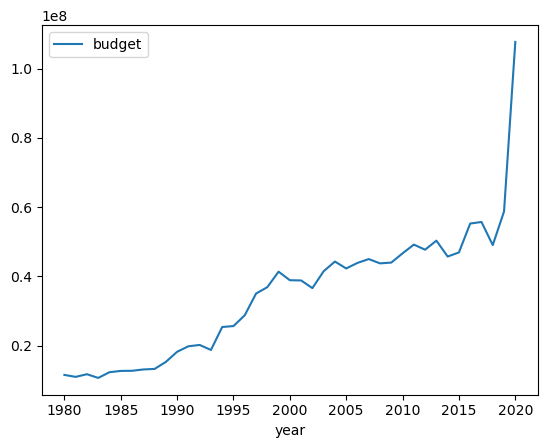

In [195]:
counts_by_yr.plot('year', 'budget');

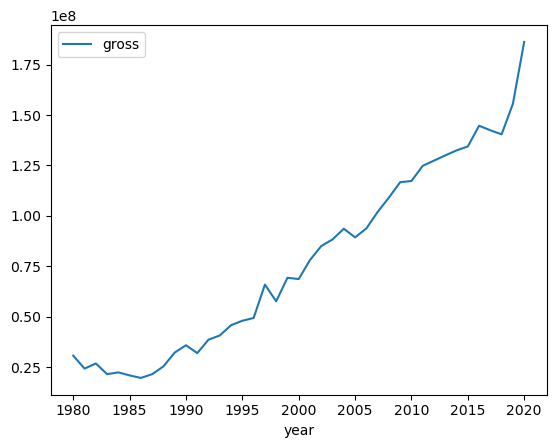

In [196]:
counts_by_yr.plot('year', 'gross');

In [179]:
movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
0,The Shining,4.000,Drama,1980,"June 13, 1980 (United States)",8.400,927000.000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.000,46998772.000,Warner Bros.,146.000,June
1,The Blue Lagoon,4.000,Adventure,1980,"July 2, 1980 (United States)",5.800,65000.000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.000,58853106.000,Columbia Pictures,104.000,July
2,Star Wars: Episode V - The Empire Strikes Back,2.000,Action,1980,"June 20, 1980 (United States)",8.700,1200000.000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.000,538375067.000,Lucasfilm,124.000,June
3,Airplane!,2.000,Comedy,1980,"July 2, 1980 (United States)",7.700,221000.000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.000,83453539.000,Paramount Pictures,88.000,July
4,Caddyshack,4.000,Comedy,1980,"July 25, 1980 (United States)",7.300,108000.000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.000,39846344.000,Orion Pictures,98.000,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,6.000,Action,2020,"August 28, 2020 (United States)",6.800,3700.000,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000.000,461421559.000,Beijing Diqi Yinxiang Entertainment,149.000,August
7653,The Quarry,4.000,Crime,2020,"April 17, 2020 (Mexico)",5.400,2400.000,Scott Teems,Scott Teems,Shea Whigham,United States,NaN,3661.000,Prowess Pictures,98.000,April
7656,Tulsa,3.000,Comedy,2020,"June 3, 2020 (United States)",5.000,294.000,Scott Pryor,Scott Pryor,Scott Pryor,United States,NaN,413378.000,Pryor Entertainment,120.000,June
7657,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",6.700,903.000,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,NaN,25818882.000,We Pictures,135.000,September


#### Exporting to a Clean CSV to do more exploratory analysis, impute the missing rating/budget/runtime and adjust for inflation

In [182]:
movies.to_csv('../Project4/Data/clean.csv')

In [43]:
### Trying a Categorical Imputer on Rating for those that are missing - will try KNN Imputer to impute missing Ratings

In [98]:
# knn_imp = KNNImputer(n_neighbors = 5,
#                      weights = 'uniform',
#                     add_indicator = True,
#                      )

In [112]:
# movies_rating_imp = pd.DataFrame(knn_imp.fit_transform(movies),
#                                    columns = movies['rating'])

ValueError: could not convert string to float: 'Drama'

In [99]:
# movies['rating'] = knn_imp.fit_transform(movies['rating'])

ValueError: Expected 2D array, got 1D array instead:
array=[ 4.  4.  2. ...  3. nan  6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.